<a href="https://colab.research.google.com/github/bartiralira/DeepLearning/blob/main/7_Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>


## Exercício #7<br>
---
Utilizando o dataset Fashion MNIST, construa uma CNN para a classificação do dataset<br>
Dicas:<br>
>Utilize a LetNet 5 como exemplo bem como o exemplo visto em salada
de aula do dataset minst<br>
>Utilize o comando x_train , y_train ), x_test , y_test ) =
tf.keras.datasets.fashion_mnist.load_data () para carregar o dataset<br>

>Os labels da classe são os seguintes:<br>
0 T-shirt/top<br>
1 Trouser<br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot<br>


## 1. Bibliotecas e afins

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

 Carrega os dados do dataset MINST

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

## 2. Análise dos dados

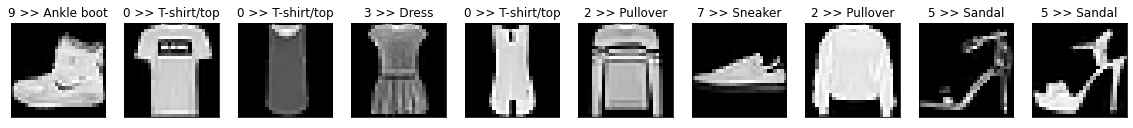

In [ ]:
#Vendo como estão as imagens e seus lables
fig = plt.figure(figsize=(20, 8))
for i in range(0,10):
  axis=fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[]) 
  axis.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  labels_name =  [e for j, e in enumerate(labels) if j == y_train[i]]
  titulo=str(y_train[i]) + " >> " + labels_name[0]
  axis.set_title(titulo)


In [ ]:
#vendo o shape do conjunto de treino
X_train.shape

(60000, 28, 28)

In [ ]:
#vendo o shape do conjunto de teste
X_test.shape

(10000, 28, 28)

## 3. Preparando dados para o modelo

In [ ]:
#Redimencionando para 28 x 28 e normalizando as imagens

img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)

# Normaliza as entradas de 0-255 para 0-1
X_train = X_train / 255
X_test = X_test / 255


(28, 28, 1)


In [ ]:
# Gera os vetores com as classes do conjunto de dados de treinamento e teste
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## 4. Modelagem

> Arquitura solicitada foi a LeNet 5 que é composta de 2 conjuntos de convolução e pooling cada mais as camadas completamente conecta:
![lenet.png](https://raw.githubusercontent.com/bartiralira/DeepLearning/main/lenet5.png)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

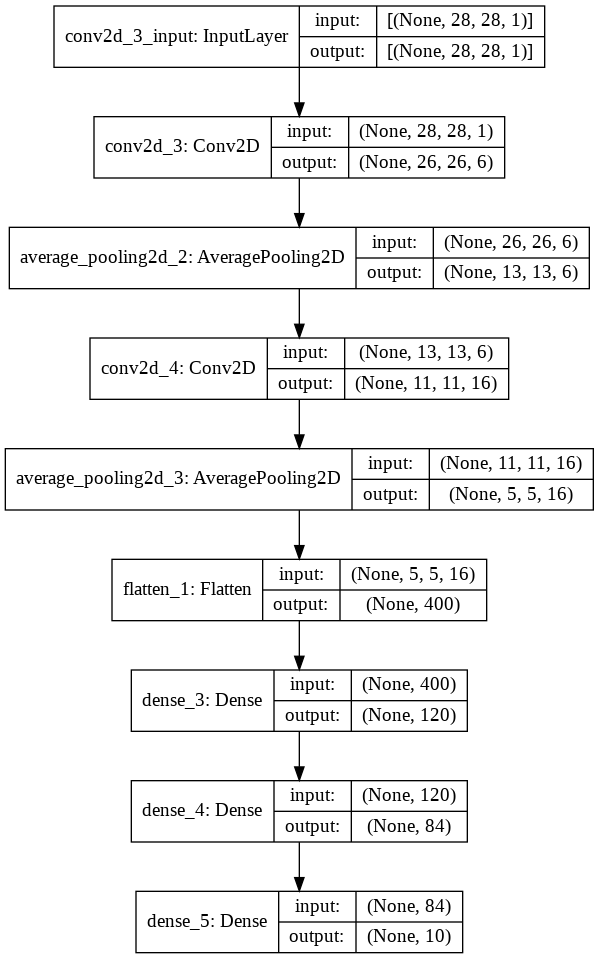

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath='modelo.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=20, batch_size=500, callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/20
96/96 [==============================] - 28s 137ms/step - loss: 1.5388 - accuracy: 0.5006 - val_loss: 0.6544 - val_accuracy: 0.7548

Epoch 00001: val_accuracy improved from -inf to 0.75483, saving model to modelo.hdf5
Epoch 2/20
96/96 [==============================] - 12s 130ms/step - loss: 0.6296 - accuracy: 0.7633 - val_loss: 0.5621 - val_accuracy: 0.7875

Epoch 00002: val_accuracy improved from 0.75483 to 0.78750, saving model to modelo.hdf5
Epoch 3/20
96/96 [==============================] - 12s 129ms/step - loss: 0.5448 - accuracy: 0.7974 - val_loss: 0.5321 - val_accuracy: 0.7981

Epoch 00003: val_accuracy improved from 0.78750 to 0.79808, saving model to modelo.hdf5
Epoch 4/20
96/96 [==============================] - 12s 129ms/step - loss: 0.5013 - accuracy: 0.8166 - val_loss: 0.4951 - val_accuracy: 0.8207

Epoch 00004: val_accuracy improved from 0.79808 to 0.82067, saving model to modelo.hdf5
Epoch 5/20
96/96 [==============================] - 12s 129ms/step - loss: 

In [ ]:
#history = model.fit(X_train, y_train, validation_split = 0.2, epochs=20, batch_size=500)

## 5. Analisar o modelo e aplicar o melhor modelo no conjunto de teste

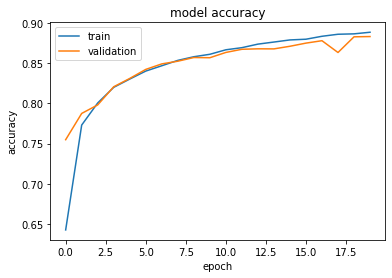

In [ ]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
melhor_model  = load_model('modelo.hdf5')

In [ ]:
scores = melhor_model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 11.85%
Acurária da CNN: 88.15%


In [ ]:
model.save('modeloMnistZerado.hdf5')

## 6. Visualizar o resultado das predições

In [ ]:
#X_test, y_test
y_hat = model.predict(X_test)

In [ ]:
y_hat[100,:]

array([8.0405818e-03, 3.5504487e-01, 1.2339649e-04, 6.2857896e-01,
       3.3119799e-05, 8.2439974e-06, 8.1030270e-03, 1.4557891e-06,
       4.7275804e-05, 1.9080726e-05], dtype=float32)

In [ ]:
y_hat.shape

(10000, 10)

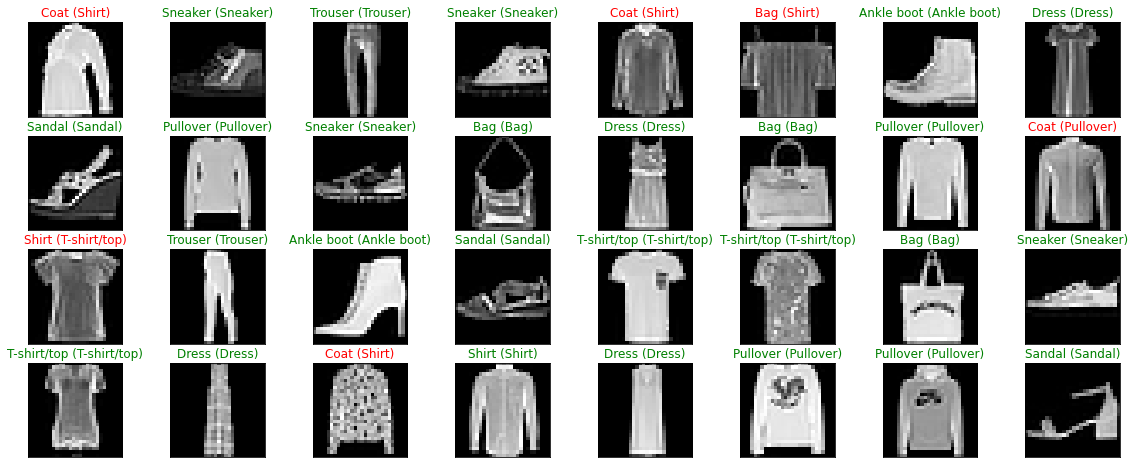

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]*255),cmap=plt.get_cmap('gray'))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
